In [15]:
import numpy as np
import pandas as pd


In [16]:
df = pd.read_csv('house_prices.csv')

In [17]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# Data Cleaning

### Removing Unwanted Features

In [18]:
df1 = df.drop(['area_type', 'availability', 'society', 'balcony'], axis='columns')

In [19]:
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [20]:
df1.shape

(13320, 5)

In [21]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [22]:
df2 = df1.dropna()

In [23]:
df2.shape

(13246, 5)

In [24]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [25]:
df2['bhk'] = df2['size'].apply(lambda x: x.split(' ')[0])

C:\Users\HP\AppData\Local\Temp\ipykernel_5496\774340660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x: x.split(' ')[0])


In [26]:
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [30]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [31]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [32]:
df2[~df2['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [37]:
def conver_sqft_to_num(x):
    token =  x.split('-')
    if len(token)==2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [38]:
df3 = df2.copy()

In [39]:
df3['total_sqft'] = df3['total_sqft'].apply(conver_sqft_to_num)

In [40]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


# Feature Engineering

### Creating price per square feet column by dividing the price * 100000 by total square feet, we are multiplying the price with 1 lakh since the prices are measured in lakhs

In [41]:
df4 = df3.copy()

In [44]:
df4['price_per_sqft'] = round(df4['price'] * 100000 / df4['total_sqft'], 2)

In [45]:
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.89
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.00


In [55]:
len(df4.location.unique())

1304

In [58]:
location_count = df4.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [59]:
location_count

location
Whitefield             534
Sarjapur  Road         392
Electronic City        302
Kanakpura Road         266
Thanisandra            233
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1304, dtype: int64

In [62]:
location_with_lessthan_10 = location_count[location_count <= 10]

In [65]:
len(location_with_lessthan_10)


1063

In [66]:
df4.location = df4.location.apply(lambda x: 'other' if x in location_with_lessthan_10 else x)

In [67]:
len(df4.location.unique())

242

# Outlier Detection and Removal using standard deviation

### There is a contradiction between square feet and the number of bedrooms

In [68]:
df5 = df4.copy()

In [73]:
df5.bhk = df5.bhk.astype(float)

In [74]:
df5.dtypes

location           object
size               object
total_sqft        float64
bath              float64
price             float64
bhk               float64
price_per_sqft    float64
dtype: object

In [75]:
df5[df5.total_sqft/df5.bhk < 300]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6.0,36274.51
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8.0,33333.33
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6.0,10660.98
68,other,8 Bedroom,1350.0,7.0,85.0,8.0,6296.30
70,other,3 Bedroom,500.0,3.0,100.0,3.0,20000.00
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7.0,15571.43
13279,other,6 Bedroom,1200.0,5.0,130.0,6.0,10833.33
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5.0,9090.91
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5.0,9043.93


In [76]:
df6 = df5[~(df5.total_sqft/df5.bhk < 300)]

In [77]:
df6.shape

(12502, 7)

In [78]:
df5.shape

(13246, 7)

In [79]:
df5.price_per_sqft.describe()

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678300e+02
25%      4.267700e+03
50%      5.438335e+03
75%      7.317070e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [82]:
def remove_outlier(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m =np.mean(subdf.price_per_sqft)
        sd = np.std(subdf.price_per_sqft)
        reduced_df = subdf[((subdf.price_per_sqft) > (m-sd)) & ((subdf.price_per_sqft) <= (m+sd))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

In [83]:
df7 = remove_outlier(df6)

In [84]:
df7.shape

(8346, 7)

### number of bathrooms cannot be more than number of bedrooms 

In [85]:
import matplotlib.pyplot as plt

(array([3.139e+03, 3.817e+03, 7.610e+02, 3.600e+02, 1.970e+02, 4.200e+01,
        1.300e+01, 1.200e+01, 1.000e+00, 4.000e+00]),
 array([ 2439.02 ,  4795.118,  7151.216,  9507.314, 11863.412, 14219.51 ,
        16575.608, 18931.706, 21287.804, 23643.902, 26000.   ]),
 <BarContainer object of 10 artists>)

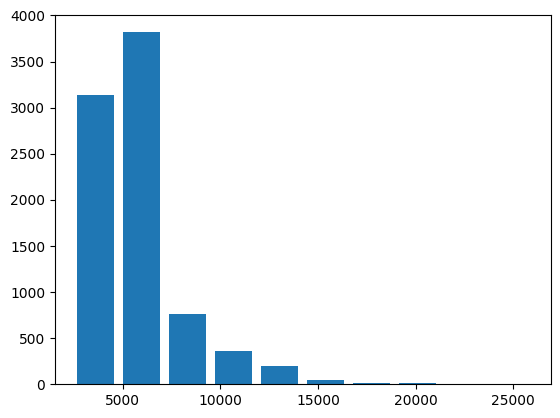

In [90]:
plt.hist(df7.price_per_sqft, rwidth=0.8)

In [92]:
df7.bath.unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6.,  7.,  9., 12., 10., 27., 16.,
       15., 13.])

In [93]:
df7[df7.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
3760,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10.0,4000.00
6220,other,27 BHK,8000.0,27.0,230.0,27.0,2875.00
6272,other,8 Bedroom,990.0,12.0,120.0,8.0,12121.21
6473,other,10 BHK,12000.0,12.0,525.0,10.0,4375.00
6565,other,16 BHK,10000.0,16.0,550.0,16.0,5500.00
6799,other,14 BHK,1250.0,15.0,125.0,14.0,10000.00
7351,other,11 BHK,6000.0,12.0,150.0,11.0,2500.00
7703,other,13 BHK,5425.0,13.0,275.0,13.0,5069.12


(array([7.361e+03, 9.090e+02, 5.200e+01, 1.600e+01, 5.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1. ,  3.6,  6.2,  8.8, 11.4, 14. , 16.6, 19.2, 21.8, 24.4, 27. ]),
 <BarContainer object of 10 artists>)

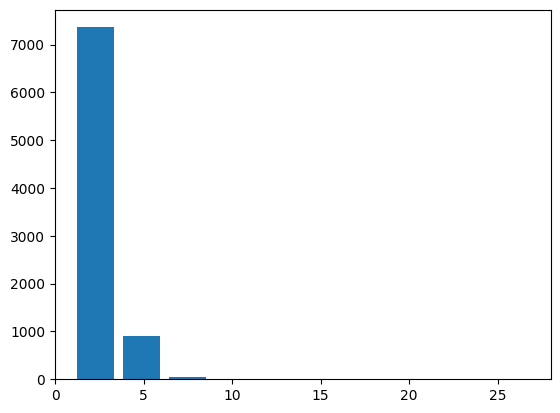

In [95]:
plt.hist(df7.bath,rwidth=0.8)

In [101]:
df7[df7.bath > df7.bhk+2]


,location,size,total_sqft,bath,price,bhk,price_per_sqft
1235,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4.0,3252.03
3734,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4.0,6428.57
4876,Thanisandra,3 BHK,1806.0,6.0,116.0,3.0,6423.03
6272,other,8 Bedroom,990.0,12.0,120.0,8.0,12121.21
6393,other,6 BHK,11338.0,9.0,1000.0,6.0,8819.90
7717,other,6 Bedroom,1200.0,9.0,122.0,6.0,10166.67


In [99]:
df8 = df7[~(df7.bath > df7.bhk+2)]

In [100]:
df8.shape

(8340, 7)

### Finally dropping all unwanted features

In [103]:
df9 = df8.drop(['size','price_per_sqft'], axis=1)

In [104]:
df9.head()

,location,total_sqft,bath,price,bhk
0,Devarachikkanahalli,1250.0,2.0,44.0,3.0
1,Devarachikkanahalli,1170.0,2.0,40.0,2.0
2,Devarachikkanahalli,1425.0,2.0,65.0,3.0
3,Devarachikkanahalli,947.0,2.0,43.0,2.0
4,Devarachikkanahalli,1230.0,2.0,58.0,2.0


In [106]:
len(df9.location.unique())

242

In [109]:
dummies = pd.get_dummies(df9.location).astype(int)

In [110]:
dummies

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8341,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8342,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8343,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8344,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [111]:
df10 = pd.concat([df9, dummies], axis='columns')

In [112]:
df10.head()

,location,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,Devarachikkanahalli,1250.0,2.0,44.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Devarachikkanahalli,1170.0,2.0,40.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1425.0,2.0,65.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,947.0,2.0,43.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1230.0,2.0,58.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model Building

In [152]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso

In [153]:
X = df10.drop(['price','location','other'], axis=1)

In [154]:
Y = df10['price']

In [160]:
model_params = {
    'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
}

In [161]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X,Y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
scoreDF = pd.DataFrame(scores,columns=['model','best_score','best_params'])
scoreDF

C:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python312\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Python312\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 96, in validate_pa

,model,best_score,best_params
0,linear_regression,0.674755,{'fit_intercept': True}
1,lasso,0.682878,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.566039,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [162]:
lr = LinearRegression()


In [163]:
from sklearn.model_selection import train_test_split

In [168]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

In [169]:
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.8649545051463139

In [170]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns==location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    return lr.predict([x])[0]
    

In [171]:
predict_price('Whitefield',1500, 2, 2)

C:\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.06086608088522

In [172]:
X.columns

Index(['total_sqft', 'bath', 'bhk', ' Devarachikkanahalli',
       '1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [183]:
np.where(X.columns=='Yeshwanthpur')[0][0]

243

In [184]:
predict_price('Yeshwanthpur', 1500, 2, 2)

C:\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


90.58692903743948

In [185]:
import joblib

In [186]:
joblib.dump(lr, 'model.pkl')

['model.pkl']

In [187]:
model = joblib.load('model.pkl')

In [188]:
model.score(x_test, y_test)

0.8649545051463139

In [189]:
import json

In [190]:
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}

In [191]:
with open('columns.json','w') as f:
    f.write(json.dumps(columns))